#Accessing to the data:


1.   Click On the link https://drive.google.com/drive/folders/1IOGHaixSvqFRPgSLCEb-jq2uCpVvuhmh?usp=drive_link
2.   Right click on the name of the folder
3.   Select organize --> add shortcut to the folder My Drive


# Mount google drive

In [1]:
from google.colab import drive
from pathlib import Path

ROOT_PATH = '/content/drive'
drive.mount(ROOT_PATH)
# Change root path
ROOT_PATH = Path(ROOT_PATH) / 'My Drive' / 'Biomedical' / 'ECG' ;

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**EX 1: Data loading and analysis**

1.  Load data files
2.  Plot label distribution
3.  Plot signal length distribution
4.  Visualize a signal of each category


In [2]:
# support functions
from scipy.io import loadmat
import numpy as np, os, sys, joblib

def load_data(header_file):
  with open(header_file, 'r') as f:
      header = f.readlines()
  mat_file = header_file.replace('.hea', '.mat')
  x = loadmat(mat_file)
  recording = np.asarray(x['val'], dtype=np.float64)
  return recording, header

def get_labels(headers):
  classes = list()
  for filename in headers:
    tmp = filename[15]
    tmp = tmp.split(': ')[1].split(',')
    tmp = tmp[0]
    classes.append(tmp.rstrip("\n"))
  return classes


## **1.1.** Loading data files

In [4]:
import zipfile

zip = zipfile.ZipFile(ROOT_PATH /'ECG_Data.zip')
zip.extractall(ROOT_PATH) # insert directory in which you want to save the unzipped file (data_students is read only folder so you can't use it)
zip.close()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
"1 - Load data: signal & headers"
# Insert path of files containing the signals
input_directory = '/content/drive/MyDrive/Biomedical/ECG/ECG_Data'  # insert directory indicated before

print('Loading data...')
# Get name of header files contained in the folder
header_files = []
for f in os.listdir(input_directory):
    g = os.path.join(input_directory, f)
    if not f.lower().startswith('.') and f.lower().endswith('hea') and os.path.isfile(g):
        header_files.append(g)
num_files = len(header_files)

# Create empty list for recordings and header files
recordings = list()
headers = list()

# Load .mat and .hea files for each subject using the function "load_data"
for i in range(num_files):
    print('Loading file: ' + str(i+1) + '/' + str(num_files))
    recording, header = load_data(header_files[i])
    recordings.append(recording)
    headers.append(header)


Loading data...
Loading file: 1/760
Loading file: 2/760
Loading file: 3/760
Loading file: 4/760
Loading file: 5/760
Loading file: 6/760
Loading file: 7/760
Loading file: 8/760
Loading file: 9/760
Loading file: 10/760
Loading file: 11/760
Loading file: 12/760
Loading file: 13/760
Loading file: 14/760
Loading file: 15/760
Loading file: 16/760
Loading file: 17/760
Loading file: 18/760
Loading file: 19/760
Loading file: 20/760
Loading file: 21/760
Loading file: 22/760
Loading file: 23/760
Loading file: 24/760
Loading file: 25/760
Loading file: 26/760
Loading file: 27/760
Loading file: 28/760
Loading file: 29/760
Loading file: 30/760
Loading file: 31/760
Loading file: 32/760
Loading file: 33/760
Loading file: 34/760
Loading file: 35/760
Loading file: 36/760
Loading file: 37/760
Loading file: 38/760
Loading file: 39/760
Loading file: 40/760
Loading file: 41/760
Loading file: 42/760
Loading file: 43/760
Loading file: 44/760
Loading file: 45/760
Loading file: 46/760
Loading file: 47/760
Loadin

## **1.2.** Plot label distribution

In [7]:
"2 - Plot label distribution"
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# get all labels from the loaded header files (use get_labels function)
labels = get_labels(headers)

In [8]:
# Adapt labels into AF or NSR
AF_code = '164889003'
NSR_code = '426783006'

labels_adapt = list()
for label_temp in labels:
  if AF_code in label_temp:
      labels_adapt.append('AF') # To Complete
  elif  NSR_code in label_temp:
      labels_adapt.append('NSR') # To Complete
  else:
    labels_adapt.append('Others') # To Complete


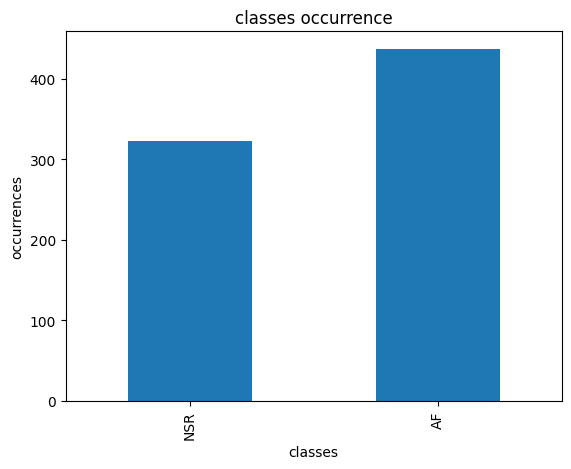

In [9]:
# Create label histogram using Counter and pandas Dataframe
label_counts = Counter(labels_adapt)
df = pd.DataFrame.from_dict(label_counts, orient='index')
df.plot(kind='bar', legend=False, title='classes occurrence', xlabel='classes', ylabel='occurrences')
plt.show()

## **1.3.** Plot signal length distribution


Text(0.5, 1.0, 'Signal length distribution')

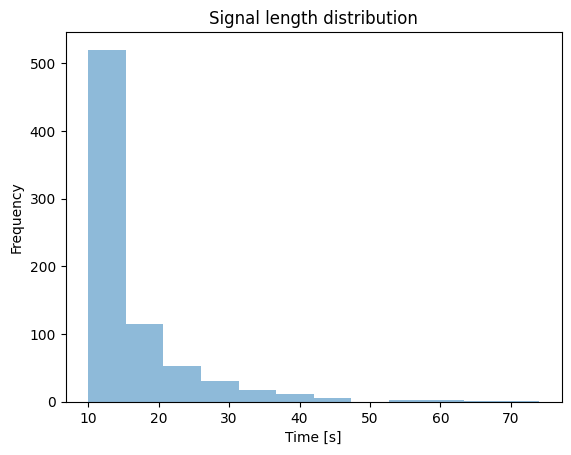

In [10]:
"3 - Plot signal length distribution"
fs = 500
# Create empty list to contain the different recording lenghts
length_recordings = list()

# Iterate through the different signals stored in "recordings": store signal
# length in senconds.
for rec_temp in recordings:
  length_recordings.append(len(rec_temp[0,:])/fs)

# Transform to pandas series and plot histogram.
length_rec_s = pd.Series(length_recordings)
ax = length_rec_s.plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("Time [s]")
ax.set_title("Signal length distribution")

## **1.4.** Plot a signal from each category


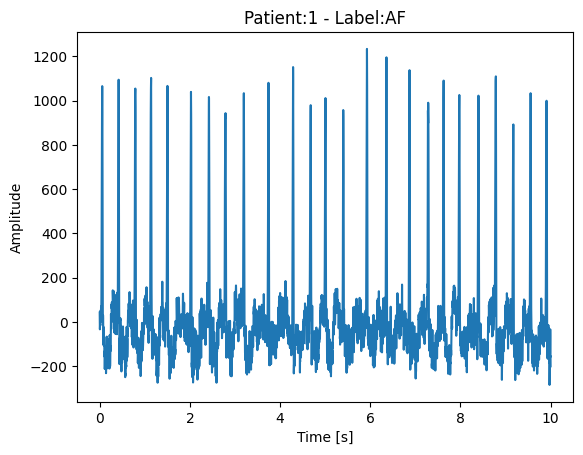

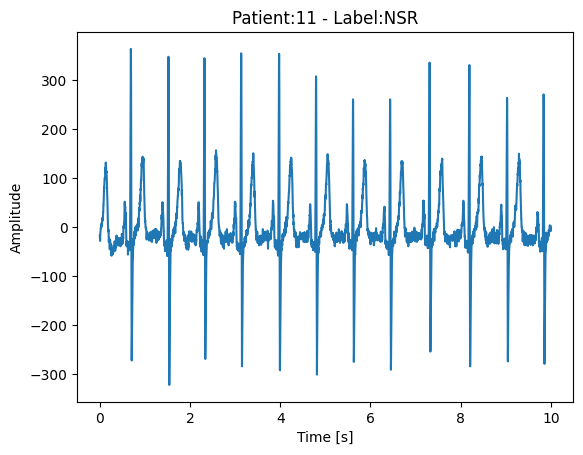

In [11]:
"4 - Plot a signal from each category"
# Tranform labels_adapt to pandas series to be able to obtain a boolean vector
# containing the positions of AF and NSR labels
labels_adapt = pd.Series(labels_adapt)
idx_AF = labels_adapt == 'AF'
idx_NSR = labels_adapt == 'NSR'

pos_AF = np.where(idx_AF)[0]
pos_NSR = np.where(idx_NSR)[0]

lead = 0

patient = pos_AF[0]
signal_temp = recordings[patient]
t = np.arange(0, signal_temp.shape[1]/fs, 1/fs)
fig, axs = plt.subplots()
axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(t, signal_temp[lead,:], color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

patient = pos_NSR[3]
signal_temp = recordings[patient]
t = np.arange(0, signal_temp.shape[1]/fs, 1/fs)
fig, axs = plt.subplots()
axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(t, signal_temp[lead,:], color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()


# **EX 2: Feature extraction**



1.   Provided data
2.   Rhythm information
3.   Morphological information



In [12]:
"Given functions"
from scipy.signal import butter, lfilter
from scipy import stats

#_______________________________________________________________________________
#1. Function to extract the relevant information provided in the header file.
#_______________________________________________________________________________

def get_headerInfo(header_data):
  tmp_hea = header_data[0].split(' ')
  ptID = tmp_hea[0]
  num_leads = int(tmp_hea[1])
  sample_Fs= int(tmp_hea[2])
  gain_lead = np.zeros(num_leads)

  for ii in range(num_leads):
      tmp_hea = header_data[ii+1].split(' ')
      gain_lead[ii] = int(tmp_hea[2].split('/')[0])

  for iline in header_data:
      if iline.startswith('#Age'):
          tmp_age = iline.split(': ')[1].strip()
          if tmp_age != 'NaN':
            age = int(tmp_age)
          else:
            age = np.NaN

      elif iline.startswith('#Sex'):
          sex = iline.split(': ')[1]
          #sex = sex[0]
      elif iline.startswith('#Dx'):
          label = iline.split(': ')[1]

  return   ptID, fs, age, sex.rstrip("\n"), label.rstrip("\n")


#_______________________________________________________________________________
#2. Collection of functions for R peak detection
#_______________________________________________________________________________

def detect_peaks(ecg_measurements,signal_frequency,gain):

        """
        Method responsible for extracting peaks from loaded ECG measurements data through measurements processing.
        This implementation of a QRS Complex Detector is by no means a certified medical tool and should not be used in health monitoring.
        It was created and used for experimental purposes in psychophysiology and psychology.
        You can find more information in module documentation:
        https://github.com/c-labpl/qrs_detector
        If you use these modules in a research project, please consider citing it:
        https://zenodo.org/record/583770
        If you use these modules in any other project, please refer to MIT open-source license.
        If you have any question on the implementation, please refer to:
        Michal Sznajder (Jagiellonian University) - technical contact (msznajder@gmail.com)
        Marta lukowska (Jagiellonian University)
        Janko Slavic peak detection algorithm and implementation.
        https://github.com/c-labpl/qrs_detector
        https://github.com/jankoslavic/py-tools/tree/master/findpeaks

        MIT License
        Copyright (c) 2017 Michal Sznajder, Marta Lukowska

        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
        FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
        AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
        LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
        OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
        SOFTWARE.
        """

        filter_lowcut = 0.001
        filter_highcut = 15.0
        filter_order = 1
        integration_window = 30  # Change proportionally when adjusting frequency (in samples).
        findpeaks_limit = 0.35
        findpeaks_spacing = 100  # Change proportionally when adjusting frequency (in samples).
        refractory_period = 240  # Change proportionally when adjusting frequency (in samples).
        qrs_peak_filtering_factor = 0.125
        noise_peak_filtering_factor = 0.125
        qrs_noise_diff_weight = 0.25


        # Detection results.
        qrs_peaks_indices = np.array([], dtype=int)
        noise_peaks_indices = np.array([], dtype=int)


        # Measurements filtering - 0-15 Hz band pass filter.
        filtered_ecg_measurements = bandpass_filter(ecg_measurements, lowcut=filter_lowcut, highcut=filter_highcut, signal_freq=signal_frequency, filter_order=filter_order)

        filtered_ecg_measurements[:5] = filtered_ecg_measurements[5]

        # Derivative - provides QRS slope information.
        differentiated_ecg_measurements = np.ediff1d(filtered_ecg_measurements)

        # Squaring - intensifies values received in derivative.
        squared_ecg_measurements = differentiated_ecg_measurements ** 2

        # Moving-window integration.
        integrated_ecg_measurements = np.convolve(squared_ecg_measurements, np.ones(integration_window)/integration_window)

        # Fiducial mark - peak detection on integrated measurements.
        detected_peaks_indices = findpeaks(data=integrated_ecg_measurements,
                                                     limit=findpeaks_limit,
                                                     spacing=findpeaks_spacing)

        detected_peaks_values = integrated_ecg_measurements[detected_peaks_indices]

        return detected_peaks_values,detected_peaks_indices


def bandpass_filter(data, lowcut, highcut, signal_freq, filter_order):
        """
        Method responsible for creating and applying Butterworth filter.
        :param deque data: raw data
        :param float lowcut: filter lowcut frequency value
        :param float highcut: filter highcut frequency value
        :param int signal_freq: signal frequency in samples per second (Hz)
        :param int filter_order: filter order
        :return array: filtered data
        """
        nyquist_freq = 0.5 * signal_freq
        low = lowcut / nyquist_freq
        high = highcut / nyquist_freq
        b, a = butter(filter_order, [low, high], btype="band")
        y = lfilter(b, a, data)
        return y

def findpeaks(data, spacing=1, limit=None):
        """
        Janko Slavic peak detection algorithm and implementation.
        https://github.com/jankoslavic/py-tools/tree/master/findpeaks
        Finds peaks in `data` which are of `spacing` width and >=`limit`.
        :param ndarray data: data
        :param float spacing: minimum spacing to the next peak (should be 1 or more)
        :param float limit: peaks should have value greater or equal
        :return array: detected peaks indexes array
        """
        len = data.size
        x = np.zeros(len + 2 * spacing)
        x[:spacing] = data[0] - 1.e-6
        x[-spacing:] = data[-1] - 1.e-6
        x[spacing:spacing + len] = data
        peak_candidate = np.zeros(len)
        peak_candidate[:] = True
        for s in range(spacing):
            start = spacing - s - 1
            h_b = x[start: start + len]  # before
            start = spacing
            h_c = x[start: start + len]  # central
            start = spacing + s + 1
            h_a = x[start: start + len]  # after
            peak_candidate = np.logical_and(peak_candidate, np.logical_and(h_c > h_b, h_c > h_a))

        ind = np.argwhere(peak_candidate)
        ind = ind.reshape(ind.size)
        if limit is not None:
            ind = ind[data[ind] > limit]
        return ind



## **2.1.** Provided data


In [27]:
"1 - Provided data"
# load the data provided in the header file
features = list()
header_data = list()

for i in range(num_files):
    recording = recordings[i]
    header = headers[i]
    if 'NaN' in str(header):
        continue
    header_data_temp = get_headerInfo(header)
    header_data.append(header_data_temp)

# transform the lists into a pandas dataframe for better visualization and data
# handling
header_data = pd.DataFrame(header_data, columns =['ID', 'fs', 'age', 'sex', 'label']) # To Complete
# header_data.columns = ['ID', 'fs', 'age', 'sex', 'label']
# visualize the dataframe
display(header_data)
# visualize the dataframe

,ID,fs,age,sex,label
0,A0002,500,49,Female,426783006
1,A0003,500,81,Female,164889003
2,A0004,500,45,Male,164889003
3,A0007,500,74,Male,164889003
4,A0009,500,81,Male,164889003
...,...,...,...,...,...
754,A2438,500,72,Female,"164889003,164909002"
755,A2441,500,33,Male,426783006
756,A2442,500,50,Male,426783006
757,A2446,500,85,Male,164889003


## **2.2.** Rhythm information


In [28]:
"2 - Rhythm information"

#-------------------------------------------------------------------------------
# Function for the computation of rhythm data
def get_12ECG_rhythmfeatures(data, header_data):
  tmp_hea = header_data[0].split(' ')
  num_leads = int(tmp_hea[1])
  sample_Fs= int(tmp_hea[2])
  gain_lead = np.zeros(num_leads)

  for ii in range(num_leads):
      tmp_hea = header_data[ii+1].split(' ')
      gain_lead[ii] = int(tmp_hea[2].split('/')[0])

  #   We are only using data from lead1
  peaks,idx = detect_peaks(data[0],sample_Fs,gain_lead[0])
  idx = np.diff(idx)

  #   Try to complete ...
  #   mean
  mean_RR = np.mean(idx/sample_Fs*1000) # To Complete # mean_RR is the mean interval between two R peaks.
  mean_Peaks = np.mean(peaks*gain_lead[0]) # To Complete # mean_peaks is the mean amplitude of this peak

  #   median
  median_RR = np.median(idx/sample_Fs*1000) # To Complete
  median_Peaks = np.median(peaks*gain_lead[0]) # To Complete

  #   standard deviation
  std_RR = np.std(idx/sample_Fs*1000) # To Complete
  std_Peaks = np.std(peaks*gain_lead[0]) # To Complete

  #   variance
  var_RR = stats.tvar(idx/sample_Fs*1000)
  var_Peaks = stats.tvar(peaks*gain_lead[0])

  #   Skewness
  skew_RR = stats.skew(idx/sample_Fs*1000)
  skew_Peaks = stats.skew(peaks*gain_lead[0])

  #   Kurtosis
  kurt_RR = stats.kurtosis(idx/sample_Fs*1000)
  kurt_Peaks = stats.kurtosis(peaks*gain_lead[0])

  features = np.hstack([mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,std_Peaks,
                        var_RR,var_Peaks,skew_RR,skew_Peaks,kurt_RR,kurt_Peaks])

  return features
#-------------------------------------------------------------------------------

features_rhythm = list()

for i in range(num_files):
  recording = recordings[i]
  header = headers[i]
  tmp = get_12ECG_rhythmfeatures(recording, header)
  features_rhythm.append(tmp)

features_rhythm = np.array(features_rhythm)

features_rhythm = pd.DataFrame(features_rhythm, columns =['mean_RR', 'mean_Peaks', 'median_RR', 'median_Peaks',
                                                          'std_RR', 'std_Peaks', 'var_RR','var_Peaks','skew_RR',
                                                          'skew_Peaks','kurt_RR', 'kurt_Peaks'])

features = pd.concat([header_data, features_rhythm], axis=1)
display(features)

,ID,fs,age,sex,label,mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,std_Peaks,var_RR,var_Peaks,skew_RR,skew_Peaks,kurt_RR,kurt_Peaks
0,A0002,500.0,49.0,Female,426783006,547.111111,4.308432e+05,485.0,6.040645e+05,194.374464,2.878768e+05,40003.869281,8.747712e+10,0.026446,-0.749239,-1.596362,-1.379591
1,A0003,500.0,81.0,Female,164889003,410.416667,3.692826e+06,389.0,3.750698e+06,66.004998,4.432528e+05,4546.079710,2.046594e+11,0.977579,0.003580,-0.342030,-1.137094
2,A0004,500.0,45.0,Male,164889003,439.153846,3.400341e+06,423.0,3.957618e+06,96.475063,1.466973e+06,9679.735385,2.234778e+12,0.143384,-1.492875,-0.843302,0.840322
3,A0007,500.0,74.0,Male,164889003,488.900000,5.682997e+04,499.0,5.733935e+04,55.517475,1.333413e+04,3244.410526,1.866890e+08,-1.513579,0.324407,1.944183,-0.449166
4,A0009,500.0,81.0,Male,164889003,510.903226,1.011038e+05,406.0,9.175332e+04,275.446307,9.643863e+04,78399.690323,9.600423e+09,2.208163,0.030312,5.014620,-1.955741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,A2441,500.0,33.0,Male,426783006,437.727273,2.790214e+05,432.0,2.839224e+05,77.105112,6.582443e+04,6228.303030,4.529803e+09,0.889776,-0.374252,1.830388,1.181591
756,A2442,500.0,50.0,Male,426783006,476.363636,1.113120e+06,484.0,1.559505e+06,192.485784,8.169875e+05,38815.099567,6.978081e+11,0.269365,-0.554157,-1.319943,-1.585200
757,A2446,500.0,85.0,Male,164889003,406.750000,1.307143e+06,413.0,2.097405e+06,131.878495,1.231285e+06,17708.154545,1.543136e+12,1.207519,-0.059745,1.222887,-1.939250
758,A2454,500.0,29.0,Female,426783006,446.272727,7.742298e+05,392.0,1.180797e+06,159.619201,6.723750e+05,26691.541126,4.726376e+11,1.520052,-0.181586,1.678543,-1.848666


In [30]:
"2 - Rhythm information"

#-------------------------------------------------------------------------------
# Function for the computation of rhythm data
def get_12ECG_rhythmfeatures(data, header_data):
  tmp_hea = header_data[0].split(' ')
  num_leads = int(tmp_hea[1])
  sample_Fs= int(tmp_hea[2])
  gain_lead = np.zeros(num_leads)

  for ii in range(num_leads):
      tmp_hea = header_data[ii+1].split(' ')
      gain_lead[ii] = int(tmp_hea[2].split('/')[0])

  #   We are only using data from lead1
  peaks,idx = detect_peaks(data[0],sample_Fs,gain_lead[0])
  idx = np.diff(idx)

  #   Try to complete ...
  #   mean
  mean_RR = np.mean(idx/sample_Fs*1000) # To Complete # mean_RR is the mean interval between two R peaks.
  mean_Peaks = np.mean(peaks*gain_lead[0]) # To Complete # mean_peaks is the mean amplitude of this peak

  #   median
  median_RR = np.median(idx/sample_Fs*1000) # To Complete
  median_Peaks = np.median(peaks*gain_lead[0]) # To Complete

  #   standard deviation
  std_RR = np.std(idx/sample_Fs*1000) # To Complete
  std_Peaks = np.std(peaks*gain_lead[0]) # To Complete

  #   variance
  var_RR = stats.tvar(idx/sample_Fs*1000)
  var_Peaks = stats.tvar(peaks*gain_lead[0])

  #   Skewness
  skew_RR = stats.skew(idx/sample_Fs*1000)
  skew_Peaks = stats.skew(peaks*gain_lead[0])

  #   Kurtosis
  kurt_RR = stats.kurtosis(idx/sample_Fs*1000)
  kurt_Peaks = stats.kurtosis(peaks*gain_lead[0])

  features = np.hstack([mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,std_Peaks,
                        var_RR,var_Peaks,skew_RR,skew_Peaks,kurt_RR,kurt_Peaks])

  return features
#-------------------------------------------------------------------------------

features_rhythm = list()

for i in range(num_files):
  recording = recordings[i]
  header = headers[i]
  tmp = get_12ECG_rhythmfeatures(recording, header)
  features_rhythm.append(tmp)

features_rhythm = np.array(features_rhythm)

features_rhythm = pd.DataFrame(features_rhythm, columns =['mean_RR', 'mean_Peaks', 'median_RR', 'median_Peaks',
                                                          'std_RR', 'std_Peaks', 'var_RR','var_Peaks','skew_RR',
                                                          'skew_Peaks','kurt_RR', 'kurt_Peaks'])

features = pd.concat([header_data, features_rhythm], axis=1)
display(features)

,ID,fs,age,sex,label,mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,std_Peaks,var_RR,var_Peaks,skew_RR,skew_Peaks,kurt_RR,kurt_Peaks
0,A0002,500.0,49.0,Female,426783006,547.111111,4.308432e+05,485.0,6.040645e+05,194.374464,2.878768e+05,40003.869281,8.747712e+10,0.026446,-0.749239,-1.596362,-1.379591
1,A0003,500.0,81.0,Female,164889003,410.416667,3.692826e+06,389.0,3.750698e+06,66.004998,4.432528e+05,4546.079710,2.046594e+11,0.977579,0.003580,-0.342030,-1.137094
2,A0004,500.0,45.0,Male,164889003,439.153846,3.400341e+06,423.0,3.957618e+06,96.475063,1.466973e+06,9679.735385,2.234778e+12,0.143384,-1.492875,-0.843302,0.840322
3,A0007,500.0,74.0,Male,164889003,488.900000,5.682997e+04,499.0,5.733935e+04,55.517475,1.333413e+04,3244.410526,1.866890e+08,-1.513579,0.324407,1.944183,-0.449166
4,A0009,500.0,81.0,Male,164889003,510.903226,1.011038e+05,406.0,9.175332e+04,275.446307,9.643863e+04,78399.690323,9.600423e+09,2.208163,0.030312,5.014620,-1.955741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,A2441,500.0,33.0,Male,426783006,437.727273,2.790214e+05,432.0,2.839224e+05,77.105112,6.582443e+04,6228.303030,4.529803e+09,0.889776,-0.374252,1.830388,1.181591
756,A2442,500.0,50.0,Male,426783006,476.363636,1.113120e+06,484.0,1.559505e+06,192.485784,8.169875e+05,38815.099567,6.978081e+11,0.269365,-0.554157,-1.319943,-1.585200
757,A2446,500.0,85.0,Male,164889003,406.750000,1.307143e+06,413.0,2.097405e+06,131.878495,1.231285e+06,17708.154545,1.543136e+12,1.207519,-0.059745,1.222887,-1.939250
758,A2454,500.0,29.0,Female,426783006,446.272727,7.742298e+05,392.0,1.180797e+06,159.619201,6.723750e+05,26691.541126,4.726376e+11,1.520052,-0.181586,1.678543,-1.848666


In [31]:
# create empty list to store features
features_rhythm = list()

# iterate for all recordings
for i in range(num_files):
  recording = recordings[i]
  header = headers[i]
  tmp = get_12ECG_rhythmfeatures(recording, header)
  features_rhythm.append(tmp)

# transform into dataframe
features_rhythm = np.array(features_rhythm)
features_rhythm = pd.DataFrame(features_rhythm, columns =['mean_RR', 'mean_Peaks', 'median_RR', 'median_Peaks',
                                                          'std_RR', 'std_Peaks', 'var_RR','var_Peaks','skew_RR',
                                                          'skew_Peaks','kurt_RR', 'kurt_Peaks']) # To Complete

# concatenate to header data
features = pd.concat([header_data, features_rhythm], axis=1)
display(features)

,ID,fs,age,sex,label,mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,std_Peaks,var_RR,var_Peaks,skew_RR,skew_Peaks,kurt_RR,kurt_Peaks
0,A0002,500.0,49.0,Female,426783006,547.111111,4.308432e+05,485.0,6.040645e+05,194.374464,2.878768e+05,40003.869281,8.747712e+10,0.026446,-0.749239,-1.596362,-1.379591
1,A0003,500.0,81.0,Female,164889003,410.416667,3.692826e+06,389.0,3.750698e+06,66.004998,4.432528e+05,4546.079710,2.046594e+11,0.977579,0.003580,-0.342030,-1.137094
2,A0004,500.0,45.0,Male,164889003,439.153846,3.400341e+06,423.0,3.957618e+06,96.475063,1.466973e+06,9679.735385,2.234778e+12,0.143384,-1.492875,-0.843302,0.840322
3,A0007,500.0,74.0,Male,164889003,488.900000,5.682997e+04,499.0,5.733935e+04,55.517475,1.333413e+04,3244.410526,1.866890e+08,-1.513579,0.324407,1.944183,-0.449166
4,A0009,500.0,81.0,Male,164889003,510.903226,1.011038e+05,406.0,9.175332e+04,275.446307,9.643863e+04,78399.690323,9.600423e+09,2.208163,0.030312,5.014620,-1.955741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,A2441,500.0,33.0,Male,426783006,437.727273,2.790214e+05,432.0,2.839224e+05,77.105112,6.582443e+04,6228.303030,4.529803e+09,0.889776,-0.374252,1.830388,1.181591
756,A2442,500.0,50.0,Male,426783006,476.363636,1.113120e+06,484.0,1.559505e+06,192.485784,8.169875e+05,38815.099567,6.978081e+11,0.269365,-0.554157,-1.319943,-1.585200
757,A2446,500.0,85.0,Male,164889003,406.750000,1.307143e+06,413.0,2.097405e+06,131.878495,1.231285e+06,17708.154545,1.543136e+12,1.207519,-0.059745,1.222887,-1.939250
758,A2454,500.0,29.0,Female,426783006,446.272727,7.742298e+05,392.0,1.180797e+06,159.619201,6.723750e+05,26691.541126,4.726376e+11,1.520052,-0.181586,1.678543,-1.848666


## **3.3.** Morphological information


In [32]:
"3 - Morphological information"
#Load csv file: introduce path of the signals
features_morphology = pd.read_csv (input_directory + '/features.csv') # To Complete with
display(features_morphology)

,QRSTang,QRSTang_M,AZ_OQ,AZ_OQM,AZ_OT,AZ_OTM,AZ_SVG,AZ_SVG_M,EL_OQ,EL_OQM,...,EL_SVG,EL_SVG_M,QRS_Mag,QRS_Mag_M,T_Mag,T_Mag_M,SVG_Mag,QT_interval,AUC_VM_QT,WVG
0,74.724892,96.631139,64.338772,63.672258,-26.835159,-41.981403,50.420224,18.699131,63.860422,77.617773,...,56.014235,57.389989,5.757267e+05,1.565570e+07,164200.172718,1.446059e+07,6.389319e+05,358.0,5.278774e+07,2.004804e+07
1,158.629882,170.528185,30.557931,15.625854,-129.141515,-174.876146,28.355415,26.651050,41.754297,48.664039,...,40.684923,45.177466,7.333811e+05,2.751523e+07,58626.498164,1.339862e+07,6.791215e+05,258.0,5.956400e+07,1.446827e+07
2,98.290360,82.823308,51.246764,15.194965,-55.825931,-69.322916,27.406239,-16.910619,65.364801,79.466301,...,59.241021,76.261626,7.429733e+05,3.727852e+07,285525.338022,2.497948e+07,7.565434e+05,302.0,1.075152e+08,4.739547e+07
3,136.974582,146.995765,51.606255,49.247858,179.060356,-168.978887,63.544029,84.675849,45.539513,48.311435,...,46.148965,49.675890,5.870813e+05,2.151710e+07,111738.676057,1.116458e+07,5.111130e+05,308.0,4.339884e+07,1.359066e+07
4,93.088120,96.987031,70.817771,65.559945,-22.343324,-34.367545,33.535784,-1.271836,90.135643,72.360329,...,80.860389,73.083694,4.715546e+05,2.329259e+07,357247.744320,3.772234e+07,5.760547e+05,404.0,7.028715e+07,4.185395e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,162.265902,167.557696,50.614311,62.456127,-110.806797,-104.676842,40.482077,22.987191,72.365646,75.294521,...,74.443093,79.760609,8.663423e+05,5.571063e+07,321738.042216,4.474773e+07,5.684053e+05,294.0,1.176203e+08,1.540408e+07
756,20.206481,20.456661,26.439068,14.060227,3.088871,-9.010904,20.831474,5.142154,60.226082,62.005713,...,58.827567,61.925544,7.370448e+05,3.584437e+07,246880.813594,2.252404e+07,9.724770e+05,320.0,6.893324e+07,5.748949e+07
757,98.584733,93.949365,45.268497,32.214738,-50.465722,-62.366956,26.992545,-20.393458,72.852501,92.200229,...,76.380576,102.067885,1.151615e+06,3.595969e+07,359958.785498,4.385930e+07,1.154136e+06,360.0,1.345750e+08,5.476754e+07
758,124.363558,148.031027,102.535144,73.865964,-57.262311,-76.449944,101.691162,66.577466,81.244260,84.279626,...,78.633262,81.476343,6.269833e+05,2.208274e+07,35199.140104,4.662936e+06,6.078104e+05,444.0,5.704062e+07,1.829436e+07


In [33]:
"FULL SET OF FEATURES"
# concatenate all features in a single dataframe
features = pd.concat([features, features_morphology], axis=1)

# set ID as index

# **EX 3: Feature transformation**


1.   Adapt data types  
2.   Missing data handling



## **3.1.** Adapt data types

In [34]:
"1 - Adapt all data types to be fed to the classifier"
sex = features.sex
sex_binary = list()
for sex_temp in sex:
  if sex_temp == 'Female':
    sex_binary.append(1) # To Complete
  else:
    sex_binary.append(0) # To Complete

features.sex = sex_binary
display(features)

,ID,fs,age,sex,label,mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,...,EL_SVG,EL_SVG_M,QRS_Mag,QRS_Mag_M,T_Mag,T_Mag_M,SVG_Mag,QT_interval,AUC_VM_QT,WVG
0,A0002,500.0,49.0,1,426783006,547.111111,4.308432e+05,485.0,6.040645e+05,194.374464,...,56.014235,57.389989,5.757267e+05,1.565570e+07,164200.172718,1.446059e+07,6.389319e+05,358.0,5.278774e+07,2.004804e+07
1,A0003,500.0,81.0,1,164889003,410.416667,3.692826e+06,389.0,3.750698e+06,66.004998,...,40.684923,45.177466,7.333811e+05,2.751523e+07,58626.498164,1.339862e+07,6.791215e+05,258.0,5.956400e+07,1.446827e+07
2,A0004,500.0,45.0,0,164889003,439.153846,3.400341e+06,423.0,3.957618e+06,96.475063,...,59.241021,76.261626,7.429733e+05,3.727852e+07,285525.338022,2.497948e+07,7.565434e+05,302.0,1.075152e+08,4.739547e+07
3,A0007,500.0,74.0,0,164889003,488.900000,5.682997e+04,499.0,5.733935e+04,55.517475,...,46.148965,49.675890,5.870813e+05,2.151710e+07,111738.676057,1.116458e+07,5.111130e+05,308.0,4.339884e+07,1.359066e+07
4,A0009,500.0,81.0,0,164889003,510.903226,1.011038e+05,406.0,9.175332e+04,275.446307,...,80.860389,73.083694,4.715546e+05,2.329259e+07,357247.744320,3.772234e+07,5.760547e+05,404.0,7.028715e+07,4.185395e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,A2441,500.0,33.0,0,426783006,437.727273,2.790214e+05,432.0,2.839224e+05,77.105112,...,74.443093,79.760609,8.663423e+05,5.571063e+07,321738.042216,4.474773e+07,5.684053e+05,294.0,1.176203e+08,1.540408e+07
756,A2442,500.0,50.0,0,426783006,476.363636,1.113120e+06,484.0,1.559505e+06,192.485784,...,58.827567,61.925544,7.370448e+05,3.584437e+07,246880.813594,2.252404e+07,9.724770e+05,320.0,6.893324e+07,5.748949e+07
757,A2446,500.0,85.0,0,164889003,406.750000,1.307143e+06,413.0,2.097405e+06,131.878495,...,76.380576,102.067885,1.151615e+06,3.595969e+07,359958.785498,4.385930e+07,1.154136e+06,360.0,1.345750e+08,5.476754e+07
758,A2454,500.0,29.0,1,426783006,446.272727,7.742298e+05,392.0,1.180797e+06,159.619201,...,78.633262,81.476343,6.269833e+05,2.208274e+07,35199.140104,4.662936e+06,6.078104e+05,444.0,5.704062e+07,1.829436e+07


## **3.2.** Missing data handling

In [35]:
"2 - Missing data handling"
# Compute the percentage of missing values for each feature
percent_missing = (features.isnull().sum()) * 100 / len(features) # To complete

# Store them in a dataframe and display
missing_value_df = pd.DataFrame({'column_name': features.columns,
                                 'percent_missing': percent_missing})
display(missing_value_df)


,column_name,percent_missing
ID,ID,0.131579
fs,fs,0.131579
age,age,0.131579
sex,sex,0.000000
label,label,0.131579
mean_RR,mean_RR,0.000000
mean_Peaks,mean_Peaks,0.000000
median_RR,median_RR,0.000000
median_Peaks,median_Peaks,0.000000
std_RR,std_RR,0.000000


## **3.3. Save feature set**

In [36]:
Path_save = ''
features.to_csv(Path_save + 'features_full.csv')
